<a href="https://colab.research.google.com/github/anupamtamrakar/Machine-learning/blob/master/Keras_CIFAR10_With_Regularizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,Conv2D,Flatten,BatchNormalization
from keras.utils import to_categorical
from keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print("Shape of x_train: " + str(x_train.shape))
print("Shape of x_test: " + str(x_test.shape))
print("Shape of y_test: " + str(y_test.shape))
print("Shape of y_train: " + str(y_train.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
Shape of y_train: (50000, 1)


In [0]:
#x_train = x_train / 255
#x_test = x_test / 255

In [0]:
#x_train = x_train.reshape(50000,3072)
#x_test = x_test.reshape(10000,3072)
one_hot_labels = to_categorical(y_train, num_classes=10)

In [0]:
model = Sequential()
regularizer = l2(0.0001)

In [0]:
model.add(Conv2D(input_shape=x_train[0,:,:,:].shape, filters=96, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=2,kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=192, kernel_size=(3,3),kernel_regularizer=regularizer))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10, activation="softmax"))

In [0]:
model.compile('Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(x=x_train,y=one_hot_labels,batch_size=256,epochs=20,shuffle=True)

Epoch 1/20
50000/50000 [==============================] - 38s 756us/step - loss: 1.8449 - acc: 0.4112
Epoch 2/20
50000/50000 [==============================] - 36s 722us/step - loss: 1.2136 - acc: 0.5760
Epoch 3/20
50000/50000 [==============================] - 36s 718us/step - loss: 1.0057 - acc: 0.6510
Epoch 4/20
50000/50000 [==============================] - 36s 716us/step - loss: 0.8506 - acc: 0.7086
Epoch 5/20
50000/50000 [==============================] - 36s 722us/step - loss: 0.7144 - acc: 0.7578
Epoch 6/20
50000/50000 [==============================] - 36s 722us/step - loss: 0.5981 - acc: 0.7969
Epoch 7/20
50000/50000 [==============================] - 22s 431us/step - loss: 0.5067 - acc: 0.8277
Epoch 8/20
50000/50000 [==============================] - 19s 376us/step - loss: 0.4460 - acc: 0.8514
Epoch 9/20
50000/50000 [==============================] - 19s 375us/step - loss: 0.3699 - acc: 0.8787
Epoch 10/20
50000/50000 [==============================] - 19s 376us/step - loss: 

In [0]:
one_hot_labels_test = to_categorical(y_test, num_classes=10)

In [27]:
model.evaluate(x=x_test,y=one_hot_labels_test,batch_size=32,verbose=1)

10000/10000 [==============================] - 5s 522us/step


[1.441059004688263, 0.72]

In [0]:
predictions = model.predict(x=x_test,batch_size=32)

In [0]:
preds = np.argmax(predictions,axis=1)
corr = preds == y_test

Acutual: [9], Prediction: 9


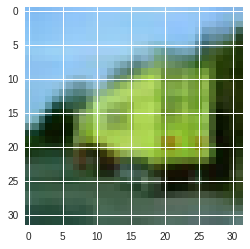

In [35]:
index = 568
plt.imshow(x_test[index])
print("Acutual: {}, Prediction: {}".format(y_test[index],preds[index]))

Correct Predictions
Acutual: [3], Prediction: 3


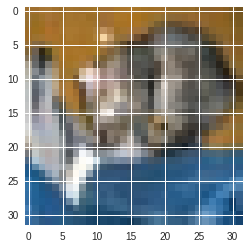

Acutual: [8], Prediction: 8


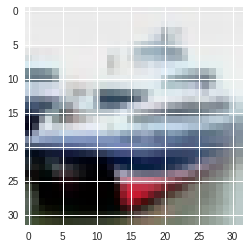

Acutual: [8], Prediction: 8


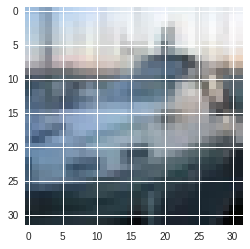

Acutual: [0], Prediction: 0


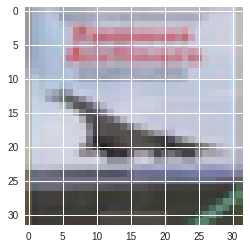

Acutual: [6], Prediction: 6


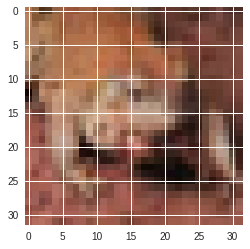

In [37]:
print("Correct Predictions")
count = 0;
for i in range(len(x_test)):
  if(preds[i]==y_test[i] and count != 5):
    plt.imshow(x_test[i])
    count +=1
    print("Acutual: {}, Prediction: {}".format(y_test[i],preds[i]))
    plt.show()

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 96)        2688      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 96)        83040     
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 96)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 192)       166080    
_________________________________________________________________
activation_13 (Activation)   (None, 12, 12, 192)       0         
__________